In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pickle
import random

In [2]:
pick_in  = open('traindata.pickle','rb')
train_data=pickle.load(pick_in)
pick_in.close()

In [3]:
features = []
labels = []

random.shuffle(train_data)

for feature,label in train_data:
    features.append(feature)
    labels.append(label)

In [4]:
xtrain = np.array(features)
ytrain = np.array(labels)

In [5]:
xtrain.shape,ytrain.shape

((794, 10000), (794,))

In [6]:
from sklearn.svm import SVC

# Create an instance of the SVC classifier
model = SVC(C=1,kernel='poly',gamma='auto')

# Fit the classifier to the training data
model.fit(xtrain, ytrain)

# # Save the trained model as a pickle string.
# pickl = {'model': model}
# pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )


SVC(C=1, gamma='auto', kernel='poly')

In [7]:
# # Save the model
# pick_in = open('model.sav','wb')
# pickle.dump(model,pick_in)
# pick_in.close

In [8]:
pick_in  = open('testdata.pickle','rb')
test_data=pickle.load(pick_in)
pick_in.close()

In [9]:
print(test_data[0])

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0]


In [10]:
testfeatures = []
testlabels = []

random.shuffle(test_data)
for feature,label in test_data:
    testfeatures.append(feature)
    testlabels.append(label)
    
xtest = np.array(testfeatures)
ytest = np.array(testlabels)


In [11]:
y_pred = model.predict(xtest)


In [12]:
# import accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest,y_pred)
accuracy

1.0

In [13]:
print("truey:",ytest)
print("predy:",y_pred)


truey: [0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0
 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1
 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0
 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1
 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1
 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1
 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0
 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1]
predy: [0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0
 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1
 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1

In [14]:
print(len(xtest))

397


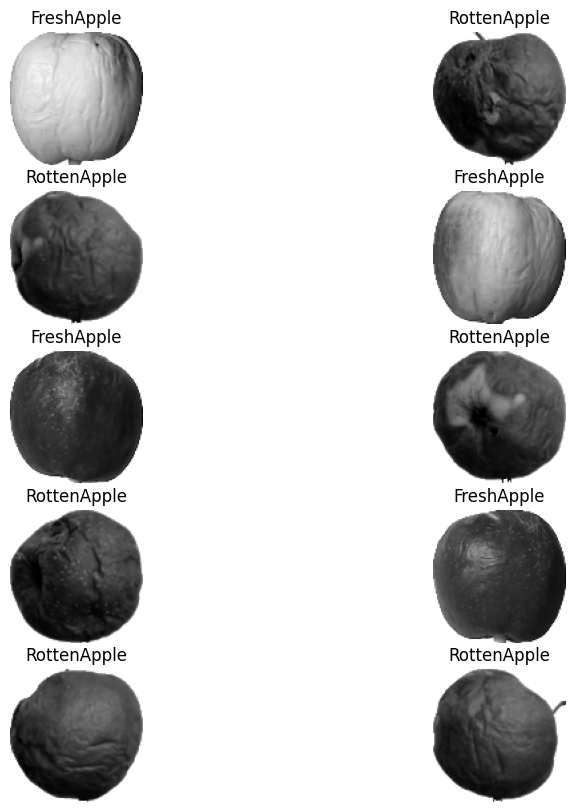

In [26]:
num = 2
prediction = model.predict(xtest[num].reshape(1, -1))
categories = ["FreshApple","RottenApple"]
img = xtest[num].reshape(100,100)
# plt.imshow(img,cmap ='gray')
# plt.title(categories[prediction[0]])

# plot first 10 images with the prediction as title
fig = plt.figure(figsize=(10,10))
for i in range(10):
    prediction = model.predict(xtest[i].reshape(1, -1))
    img = xtest[i].reshape(100,100)
    ax = fig.add_subplot(5,2,i+1)
    ax.imshow(img,cmap ='gray')
    ax.set_title(categories[prediction[0]])
    ax.axis('off')
plt.show()
